# Problem Statement

2.	Perform multilinear regression with price as the output variable and document the different RMSE values.

---- ### ----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

Lets load our dataset as data and do Exploratory Analysis

In [2]:
data = pd.read_csv('Computer_Data.csv')
data.shape

(6259, 11)

We have 6259 rows and 11 columns

In [3]:
data.columns

Index(['Unnamed: 0', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads', 'trend'],
      dtype='object')

In [4]:
data.dtypes

Unnamed: 0     int64
price          int64
speed          int64
hd             int64
ram            int64
screen         int64
cd            object
multi         object
premium       object
ads            int64
trend          int64
dtype: object

In [5]:
data.head(10) # Viewing First 10 rows of the dataset

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
5,6,3695,66,340,16,14,no,no,yes,94,1
6,7,1720,25,170,4,14,yes,no,yes,94,1
7,8,1995,50,85,2,14,no,no,yes,94,1
8,9,2225,50,210,8,14,no,no,yes,94,1
9,10,2575,50,210,4,15,no,no,yes,94,1


We have 1st row without header, lets remove the column

In [6]:
data = data.drop(columns = 'Unnamed: 0')

In [7]:
data.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


Lets explore our data and do some exploratory analysis

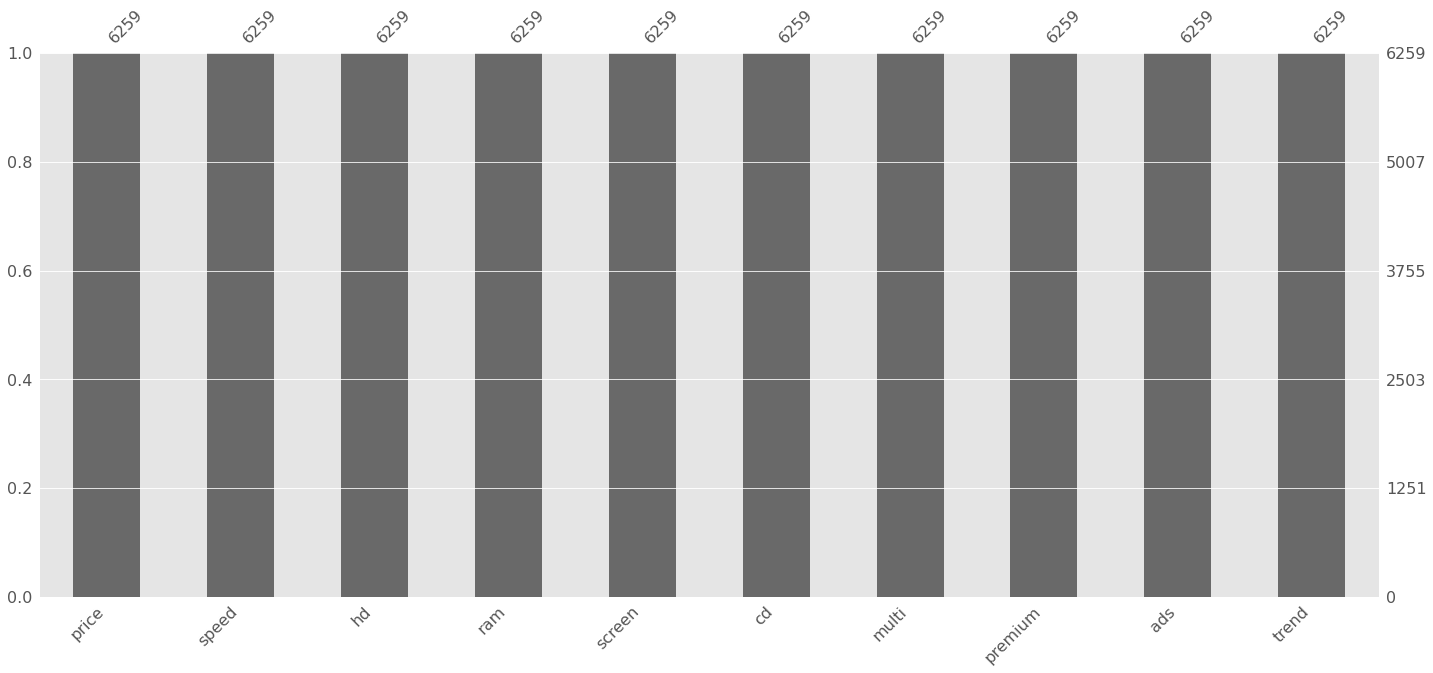

In [8]:
msno.bar(data) # To visually see any blank data

We do not see any missing value in our dataset

In [9]:
data.describe()

,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


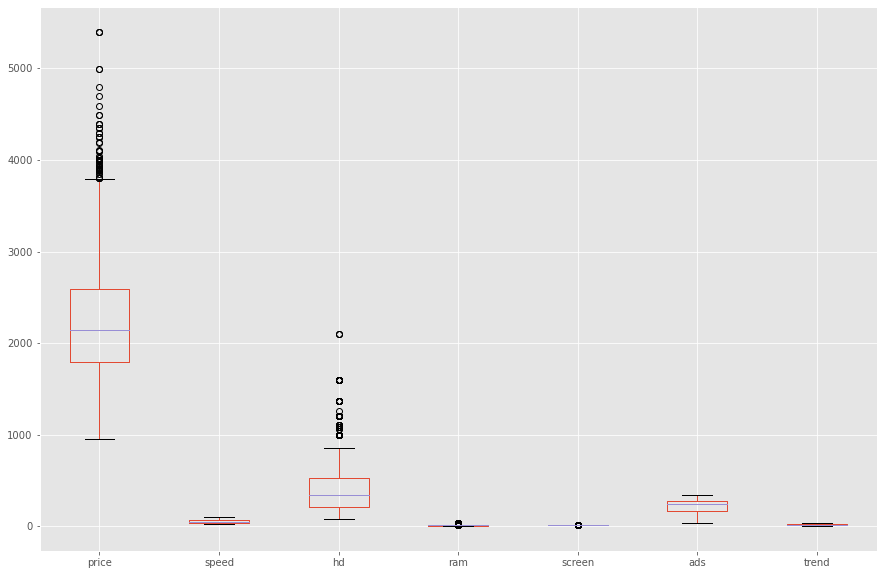

In [10]:
data[['price','speed','hd','ram','screen','ads','trend']].plot(kind='box')

Seems like there are many outliers in our dataset

Lets look at the correlation of each variable before we start transforming our data

Lets explore our categorical variables

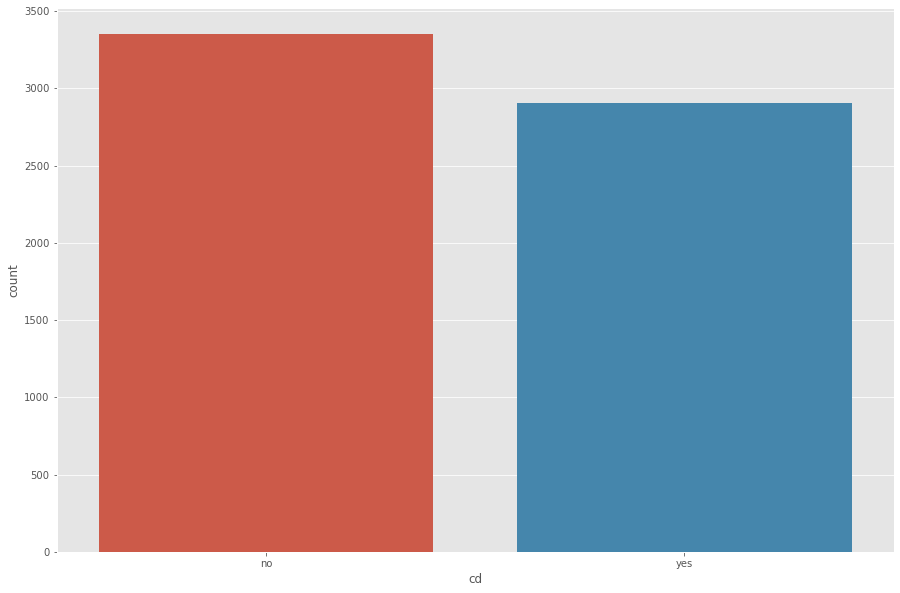

In [11]:
sns.countplot(data.cd)

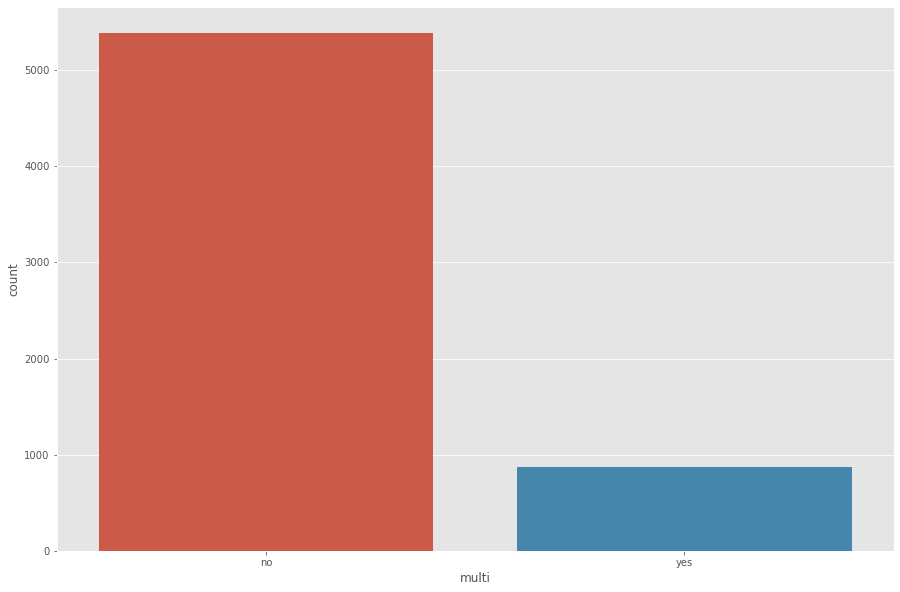

In [12]:
sns.countplot(data.multi)

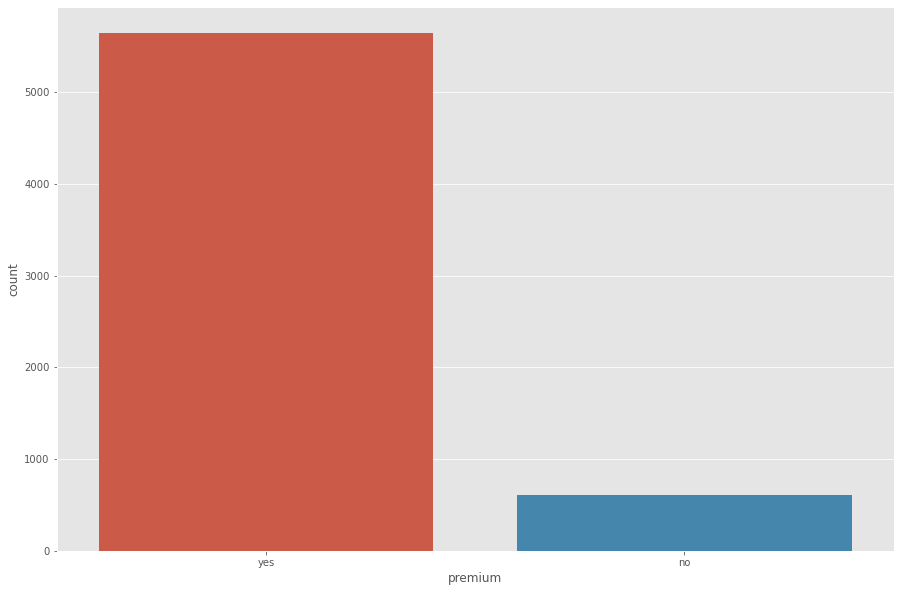

In [13]:
sns.countplot(data.premium)

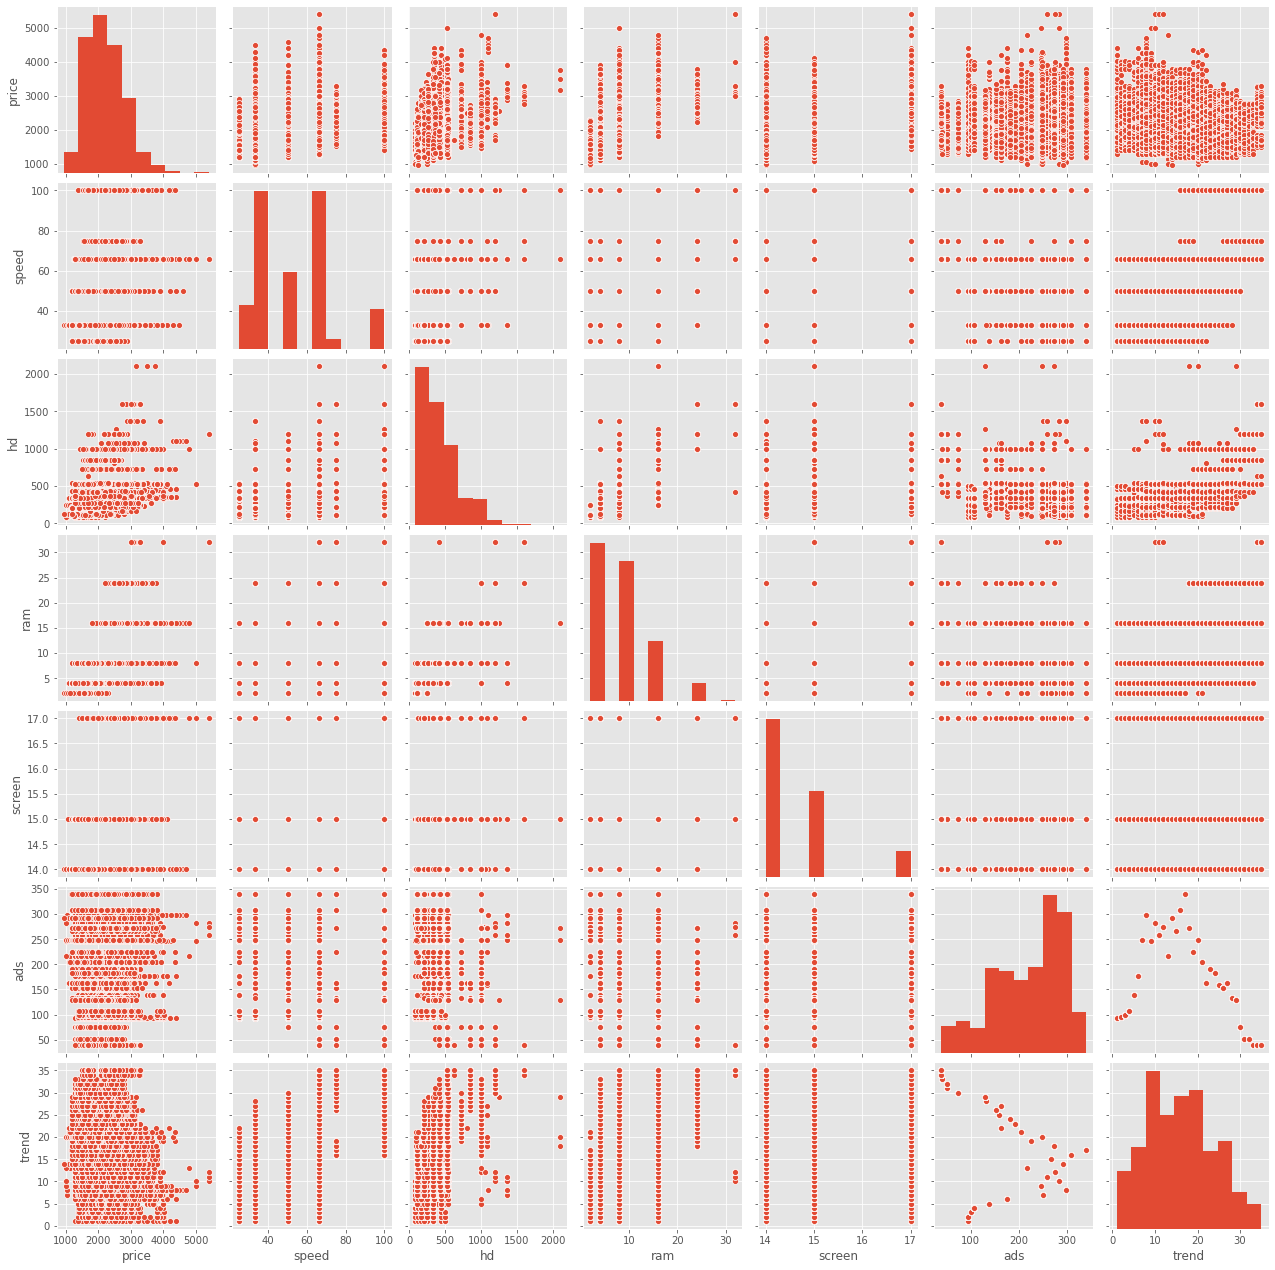

In [14]:
sns.pairplot(data)

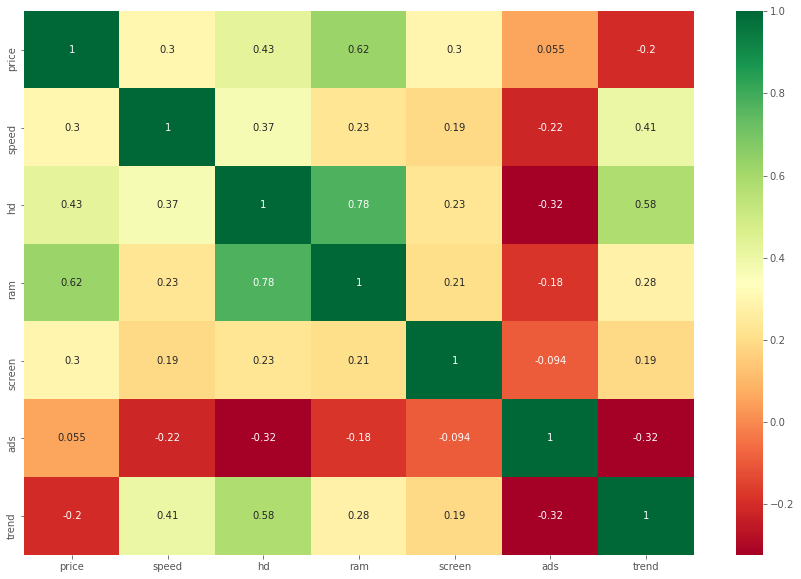

In [15]:
sns.heatmap(data.corr(),annot=True, cmap='RdYlGn')

C:\Users\jaic208\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


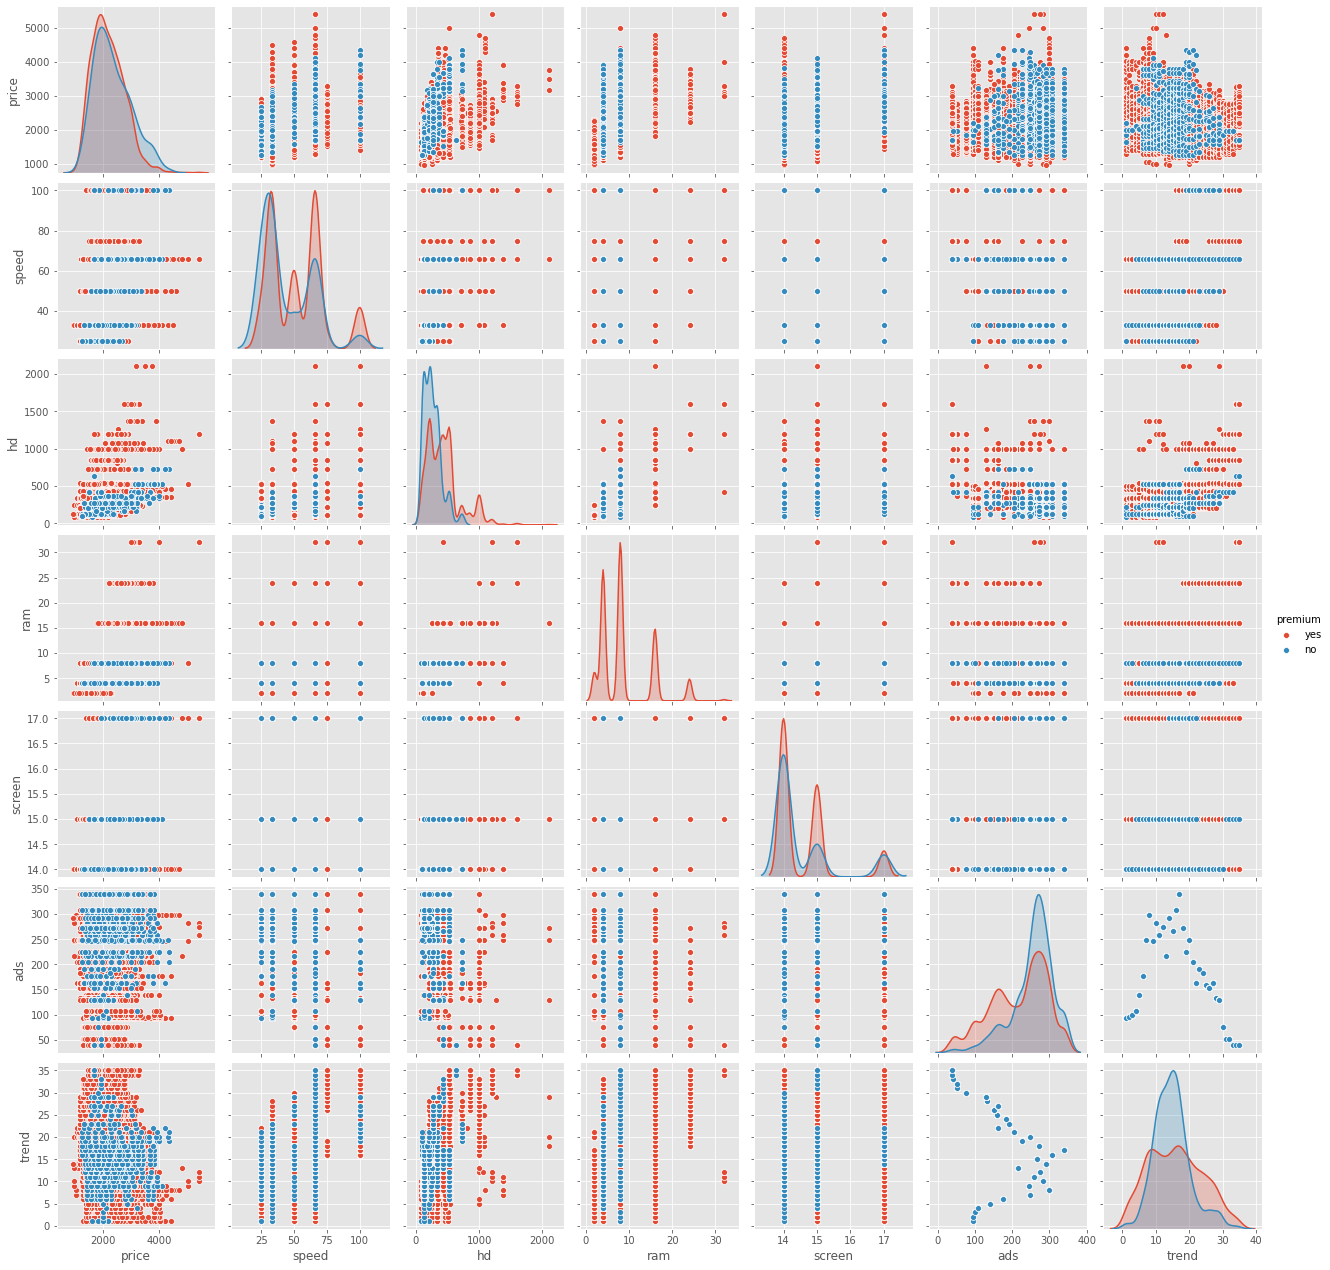

In [16]:
sns.pairplot(data,hue='premium')

Lets look whether our data is following normal distribution or not

Q - Q Plot

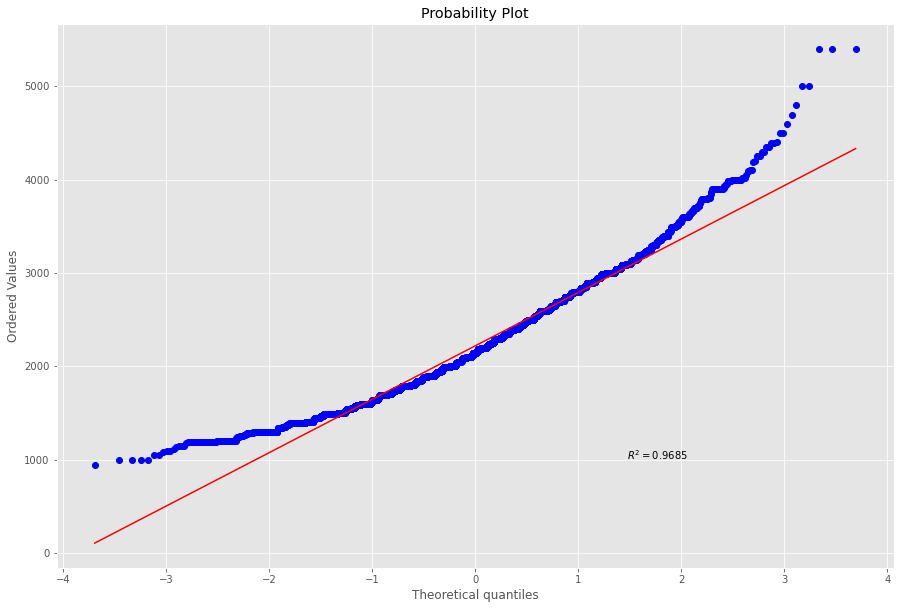

In [17]:
from scipy import stats
import pylab
stats.probplot(data.price, dist='norm', plot=pylab,rvalue=True)
plt.show()

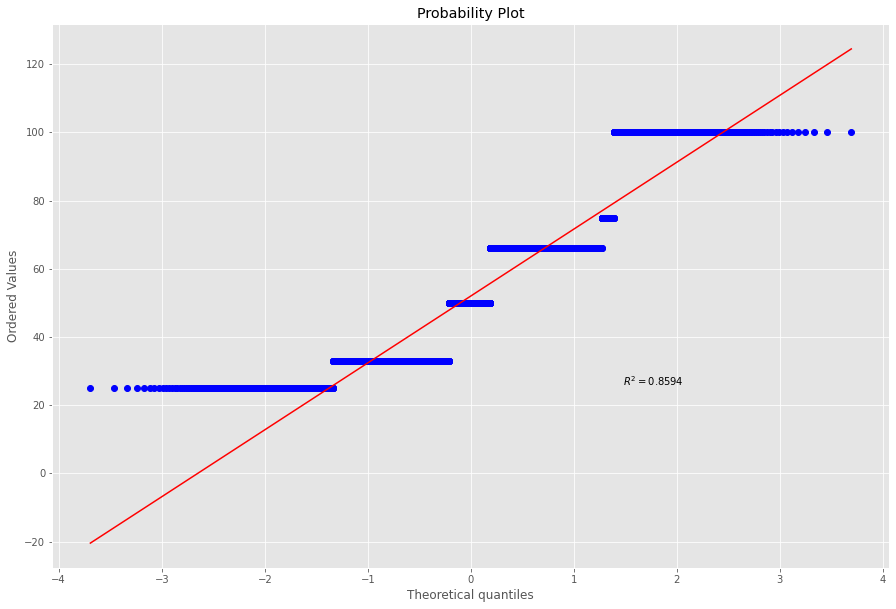

In [18]:
stats.probplot(data.speed, dist='norm', plot=pylab,rvalue=True)
plt.show()

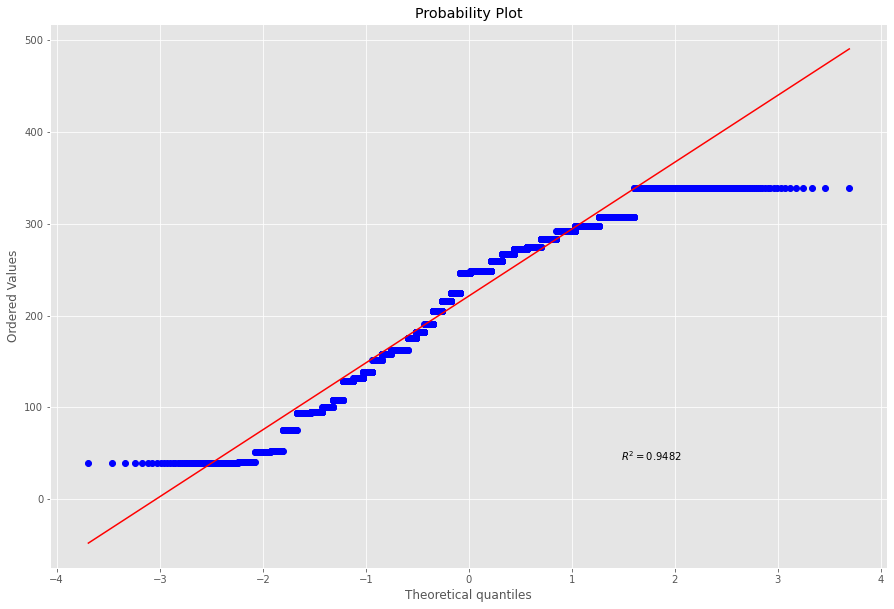

In [19]:
stats.probplot(data.ads, dist='norm', plot=pylab,rvalue=True)
plt.show()

Lets check for Co-linearity in our data

In [20]:
import statsmodels.formula.api as smf

In [21]:
ml1 = smf.ols('price ~ + speed + hd + ram + screen + ads + trend', data = data).fit()

In [22]:
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2580.
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:54:20   Log-Likelihood:                -44817.
No. Observations:                6259   AIC:                         8.965e+04
Df Residuals:                    6252   BIC:                         8.969e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -246.6755     66.371     -3.717      0.000    -376.785    -116.566
speed          8.8939      0.209     42.590      0.000       8.485       9.303
hd             0.7088      0.031     22.932      0.000       0.648       0.769
ram           47.3870      1.188     39.899      0.000      45.059      49.715
screen       126.7024      4.521     28.022      0.000     117.839     135.566
ads            0.9697      0.057     17.099      0.000       0.859       1.081
trend        -47.0820      0.676    -69.660      0.000     -48.407     -45.757
==============================================================================
Omnibus:                     1407.073   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3902.981
Skew:                           1.187   Prob(JB):                         0.00
Kurtosis:                       6.054   Cond. No.                     8.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All Variables have p value less then 0.05

Lets check for Influence Index if any data has influence

In [23]:
import statsmodels.api as sm

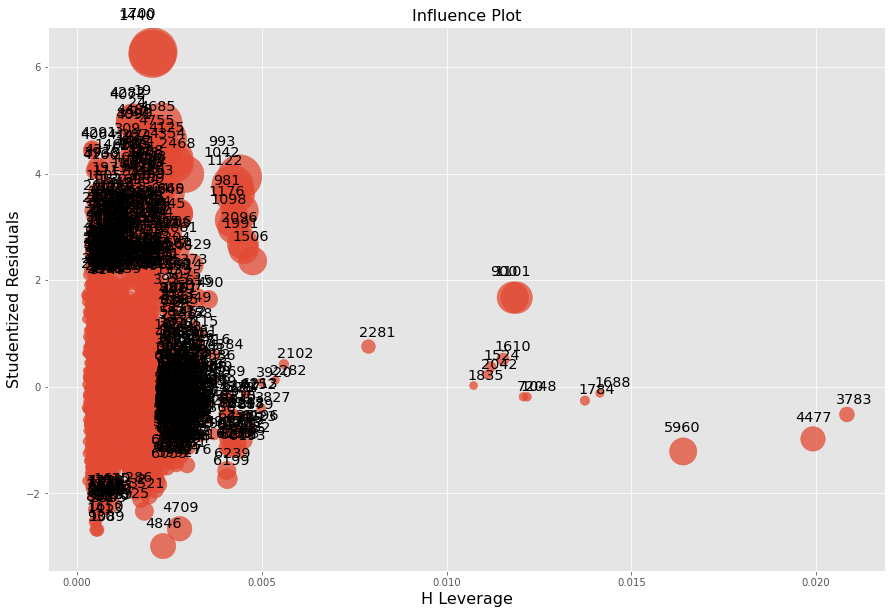

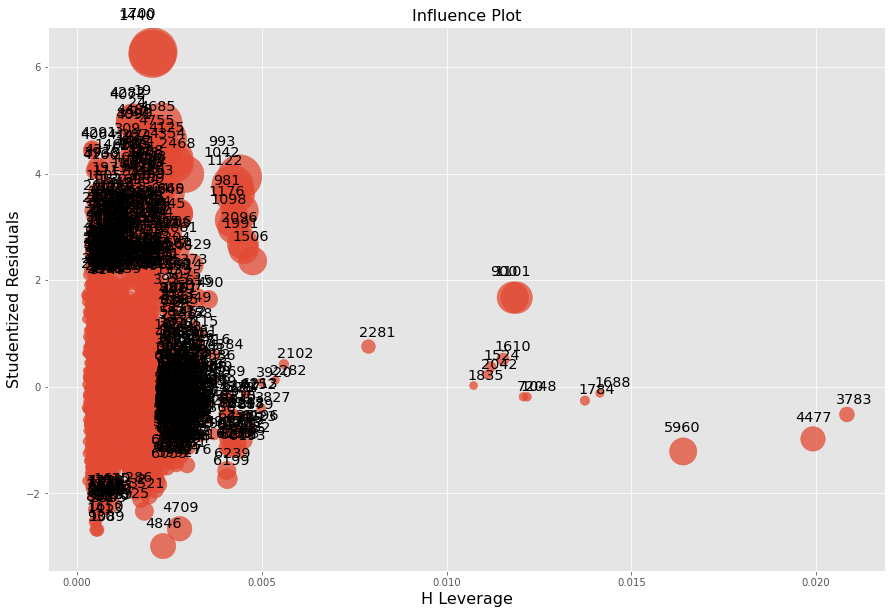

In [24]:
sm.graphics.influence_plot(ml1)

Since we do not have any specific row as an influencer and we are seeing all our numeric variables havw p-value of less then 0.05, lets build our model

In [25]:
pred = ml1.predict(data)

In [26]:
# Q - Q Plot and Residual plot

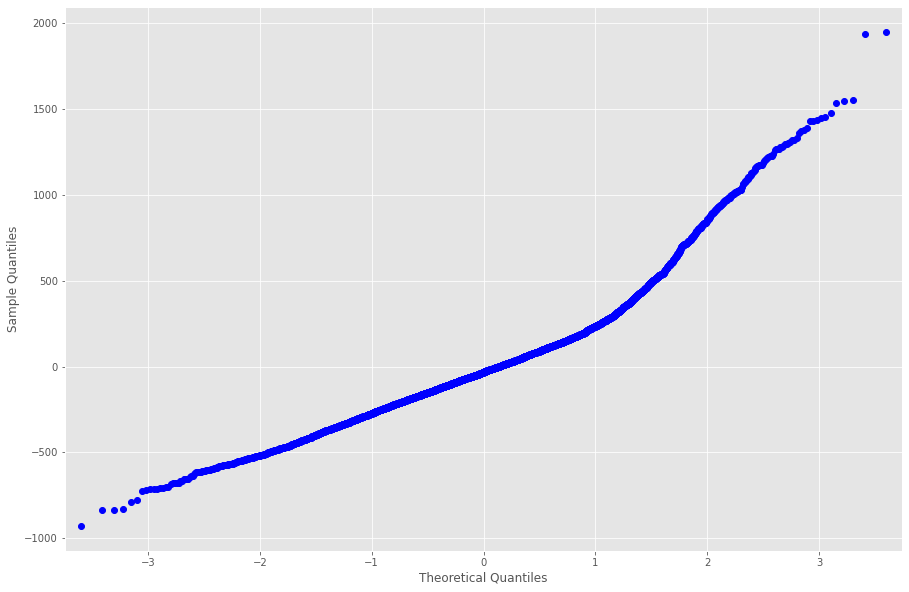

In [27]:
res = ml1.resid
sm.qqplot(res)
plt.show()

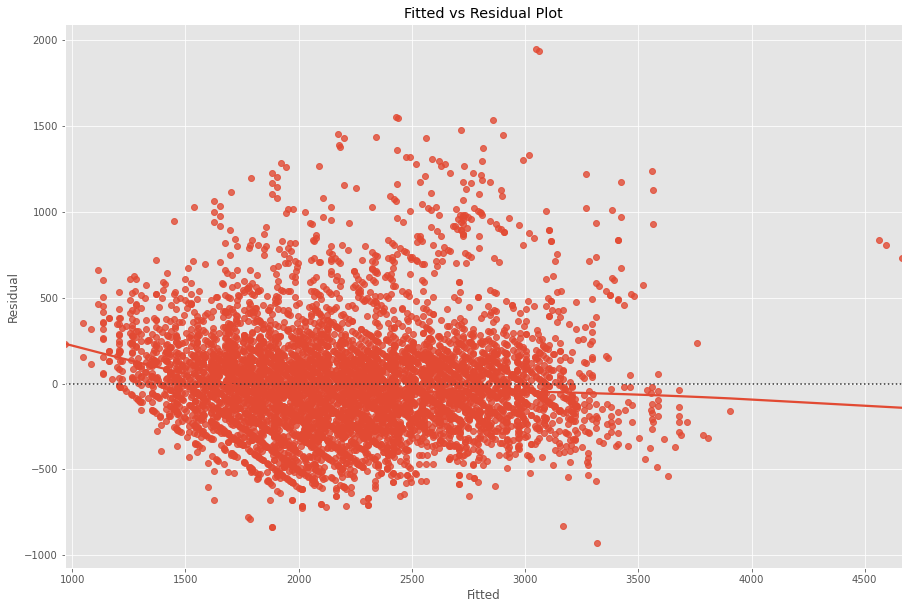

In [28]:
sns.residplot(x=pred, y = data.price, lowess=True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual Plot')
plt.show()

Building Models

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
data_train, data_test = train_test_split(data, test_size = 0.25)

In [31]:
model_train = smf.ols('price ~ + speed + hd + ram + screen + ads + trend', data = data_train).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1967.
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:55:13   Log-Likelihood:                -33548.
No. Observations:                4694   AIC:                         6.711e+04
Df Residuals:                    4687   BIC:                         6.716e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -201.2001     76.765     -2.621      0.009    -351.696     -50.704
speed          8.6248      0.237     36.418      0.000       8.160       9.089
hd             0.7279      0.035     20.857      0.000       0.660       0.796
ram           46.8898      1.346     34.837      0.000      44.251      49.529
screen       124.2353      5.239     23.715      0.000     113.965     134.506
ads            0.9721      0.065     14.904      0.000       0.844       1.100
trend        -47.1972      0.781    -60.467      0.000     -48.727     -45.667
==============================================================================
Omnibus:                     1018.663   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2753.562
Skew:                           1.154   Prob(JB):                         0.00
Kurtosis:                       5.959   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
test_pred = model_train.predict(data_test)

In [33]:
test_resid = test_pred - data_test.price

In [34]:
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

323.7829885813968

Our First Model, without doing any data transformation or dummy variables, we are getting RMSE scoe of 314.106 on our test dataset.

We will now do outlier treatment and then later on dummy variables for our categorical variables

## Outlier Treatment

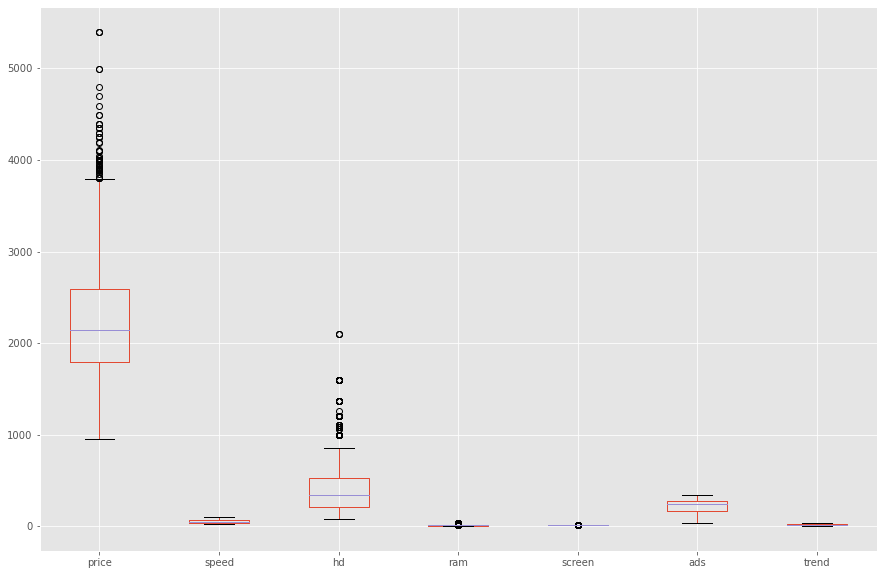

In [35]:
data[['price','speed','hd','ram','screen','ads','trend']].plot(kind='box')

As we can see there are multiple values which are outliers in our data, we will transform them to their 1.5 IQR value

In [36]:
backup = data

In [37]:
from scipy.stats import zscore

In [41]:
data = pd.get_dummies(data, drop_first=True)

We are now Transforming our data, we are treating our outliers with z value. We have converted our categorical variables into Dummy variables and removed the first instance to avoid Dummy variable Trap

In [42]:
data

,price,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
0,1499,25,80,4,14,94,1,0,0,1
1,1795,33,85,2,14,94,1,0,0,1
2,1595,25,170,4,15,94,1,0,0,1
3,1849,25,170,8,14,94,1,0,0,0
4,3295,33,340,16,14,94,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,39,35,0,0,1
6255,2223,66,850,16,15,39,35,1,1,1
6256,2654,100,1200,24,15,39,35,1,0,1
6257,2195,100,850,16,15,39,35,1,0,1


In [54]:
data1 = data.iloc[:,1:].apply(zscore)

In [57]:
data1['price'] = data['price']
data1

,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes,price
0,-1.276752,-1.301994,-0.761359,-0.672591,-1.701219,-1.895886,-0.931558,-0.402600,0.329205,1499
1,-0.898610,-1.282654,-1.116558,-0.672591,-1.701219,-1.895886,-0.931558,-0.402600,0.329205,1795
2,-1.276752,-0.953869,-0.761359,0.432329,-1.701219,-1.895886,-0.931558,-0.402600,0.329205,1595
3,-1.276752,-0.953869,-0.050962,-0.672591,-1.701219,-1.895886,-0.931558,-0.402600,-3.037618,1849
4,-0.898610,-0.296300,1.369834,-0.672591,-1.701219,-1.895886,-0.931558,-0.402600,0.329205,3295
...,...,...,...,...,...,...,...,...,...,...
6254,2.268334,0.430895,-0.050962,0.432329,-2.436225,2.422476,-0.931558,-0.402600,0.329205,1690
6255,0.661228,1.676409,1.369834,0.432329,-2.436225,2.422476,1.073470,2.483854,0.329205,2223
6256,2.268334,3.030229,2.790629,0.432329,-2.436225,2.422476,1.073470,-0.402600,0.329205,2654
6257,2.268334,1.676409,1.369834,0.432329,-2.436225,2.422476,1.073470,-0.402600,0.329205,2195


In [58]:
data1.columns

Index(['speed', 'hd', 'ram', 'screen', 'ads', 'trend', 'cd_yes', 'multi_yes',
       'premium_yes', 'price'],
      dtype='object')

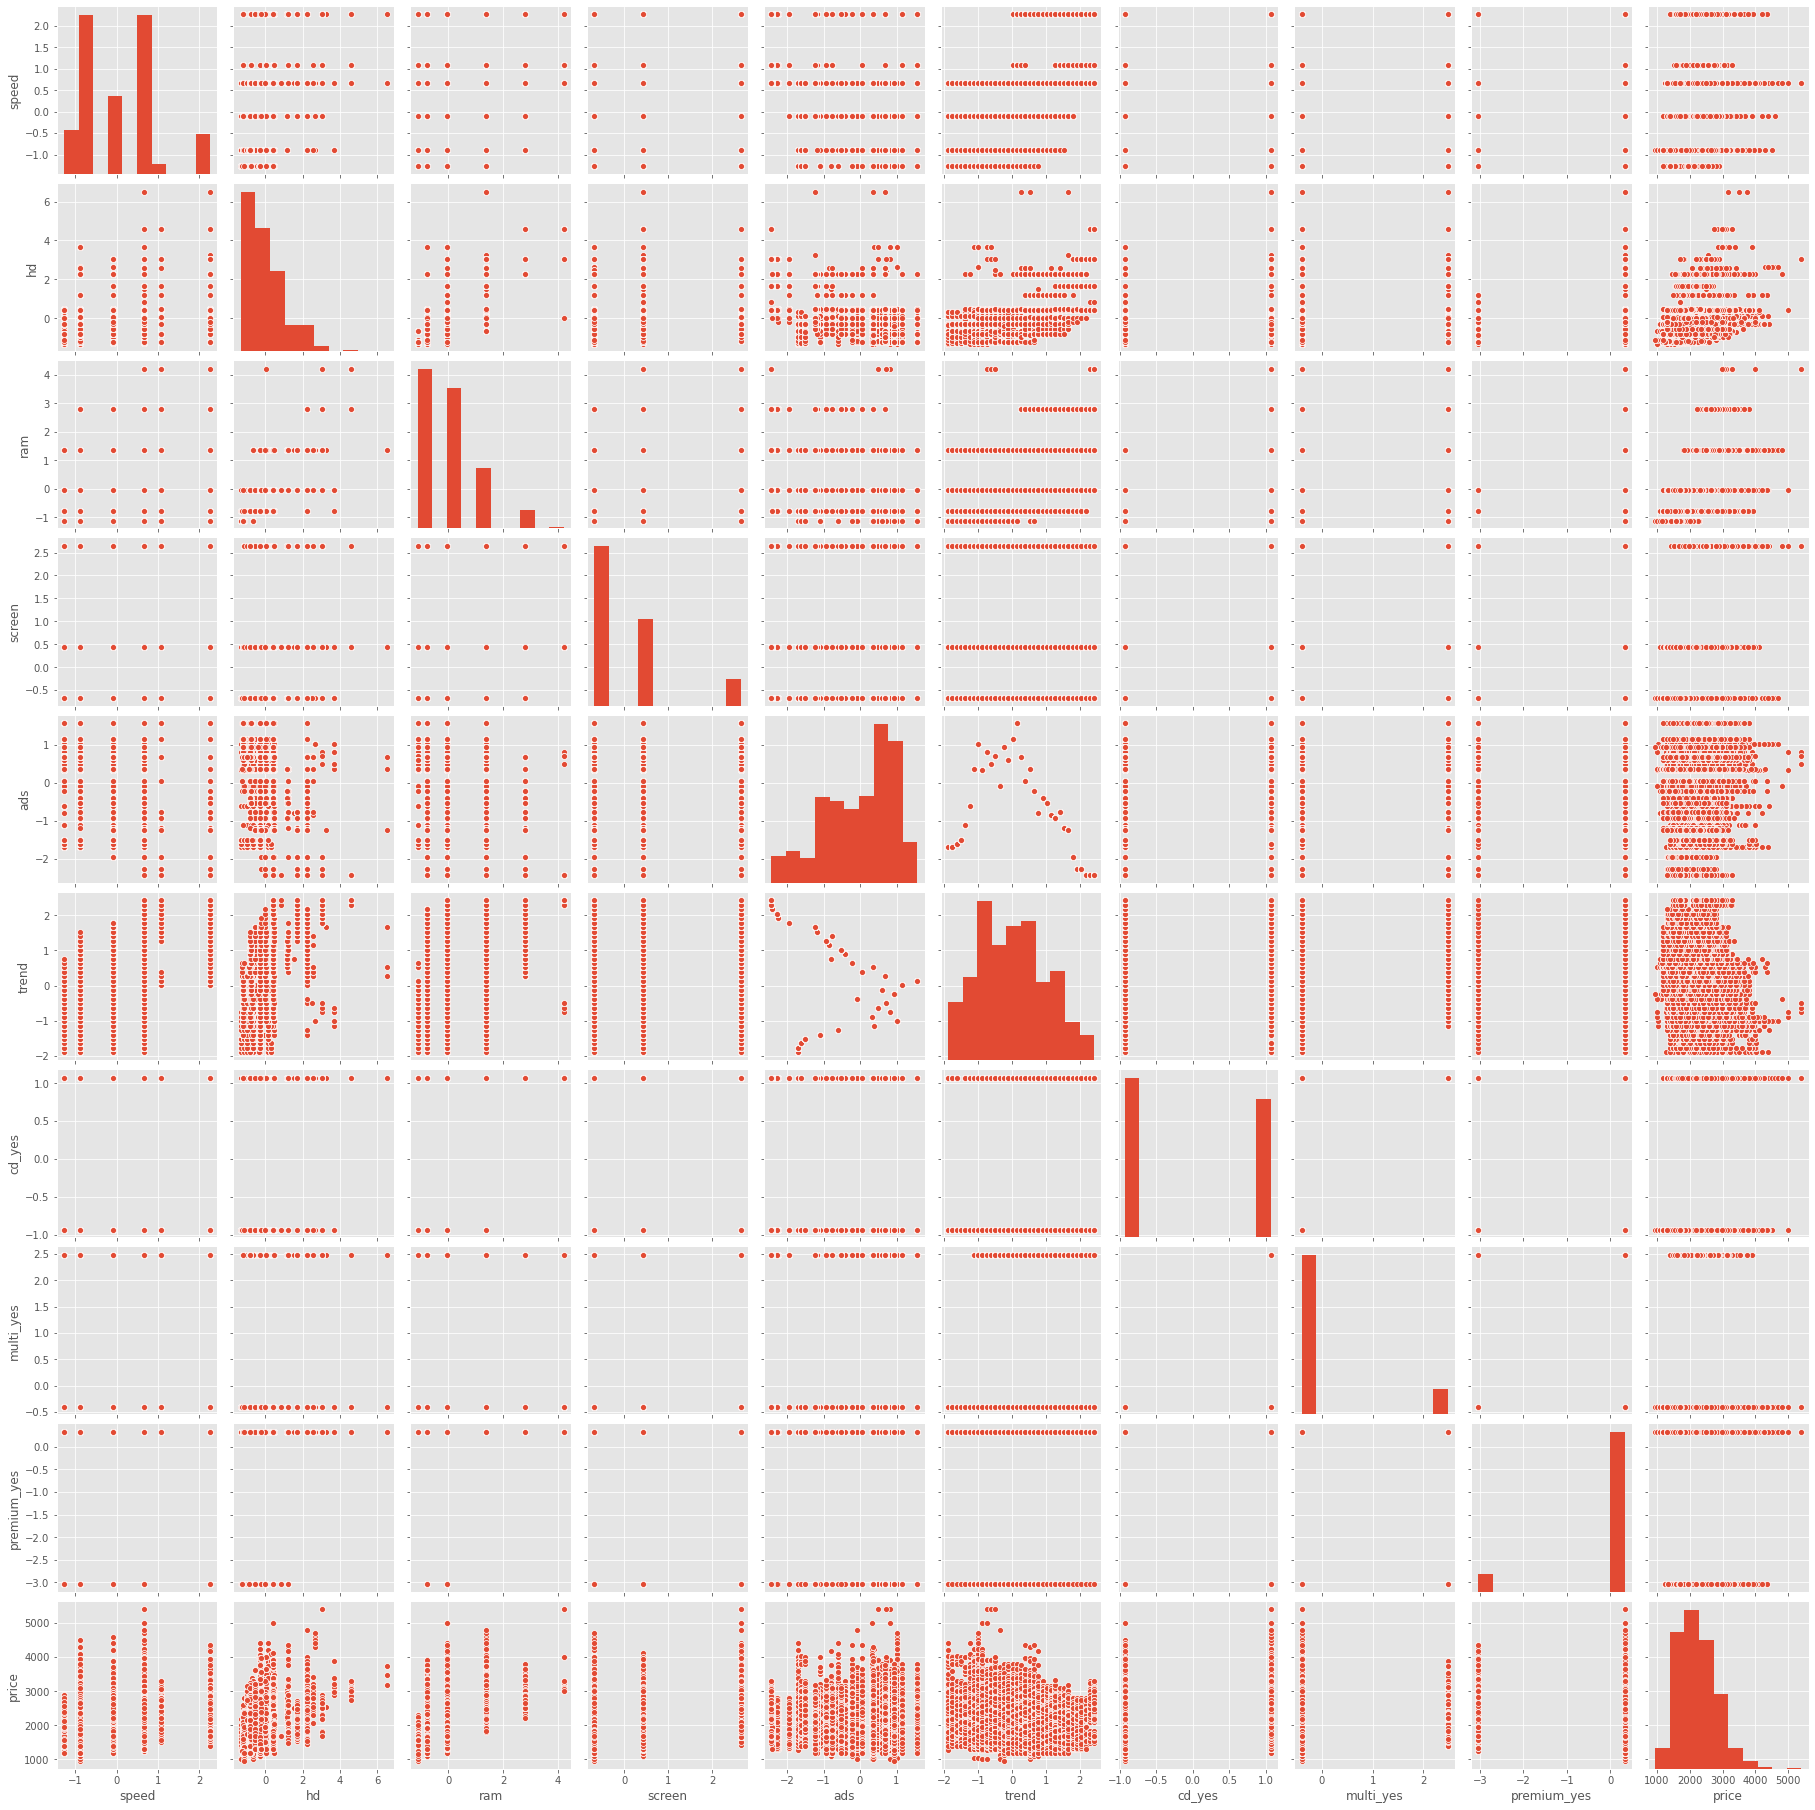

In [60]:
sns.pairplot(data1)

In [61]:
data1.columns

Index(['speed', 'hd', 'ram', 'screen', 'ads', 'trend', 'cd_yes', 'multi_yes',
       'premium_yes', 'price'],
      dtype='object')

In [65]:
ml2 = smf.ols('price ~ speed + hd + ram + screen + ads + trend + cd_yes + multi_yes + premium_yes',data = data1).fit()
ml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2399.
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:52:43   Log-Likelihood:                -44039.
No. Observations:                6259   AIC:                         8.810e+04
Df Residuals:                    6249   BIC:                         8.817e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2219.5766      3.480    637.731      0.000    2212.754    2226.399
speed         197.1803      3.915     50.364      0.000     189.505     204.855
hd            202.1118      7.139     28.311      0.000     188.117     216.107
ram           271.7124      6.003     45.265      0.000     259.945     283.480
screen        111.4009      3.620     30.776      0.000     104.305     118.497
ads            49.1847      3.840     12.809      0.000      41.657      56.712
trend        -408.2301      4.950    -82.470      0.000    -417.934    -398.526
cd_yes         30.3820      4.746      6.402      0.000      21.078      39.685
multi_yes      36.1426      3.954      9.141      0.000      28.392      43.894
premium_yes  -151.2478      3.666    -41.259      0.000    -158.434    -144.062
==============================================================================
Omnibus:                     1014.821   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3190.887
Skew:                           0.832   Prob(JB):                         0.00
Kurtosis:                       6.077   Cond. No.                         4.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Seems like all variables are significant

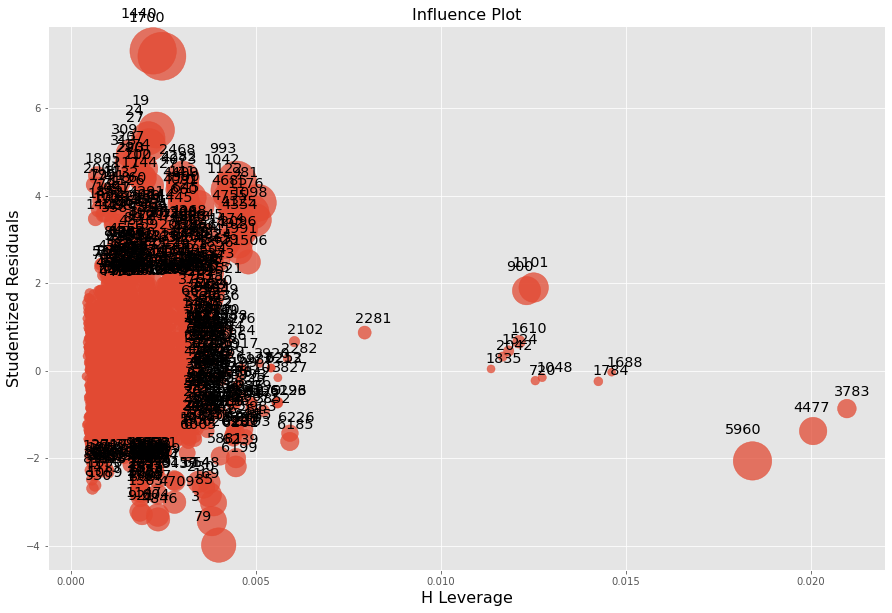

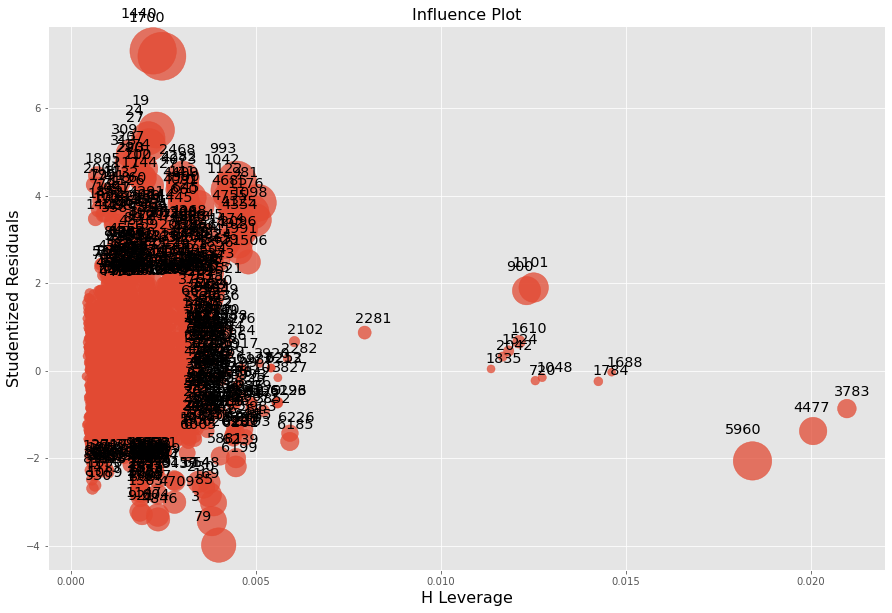

In [66]:
sm.graphics.influence_plot(ml2)


Lets look at the residual plot

In [67]:
pred = ml2.predict(data1)

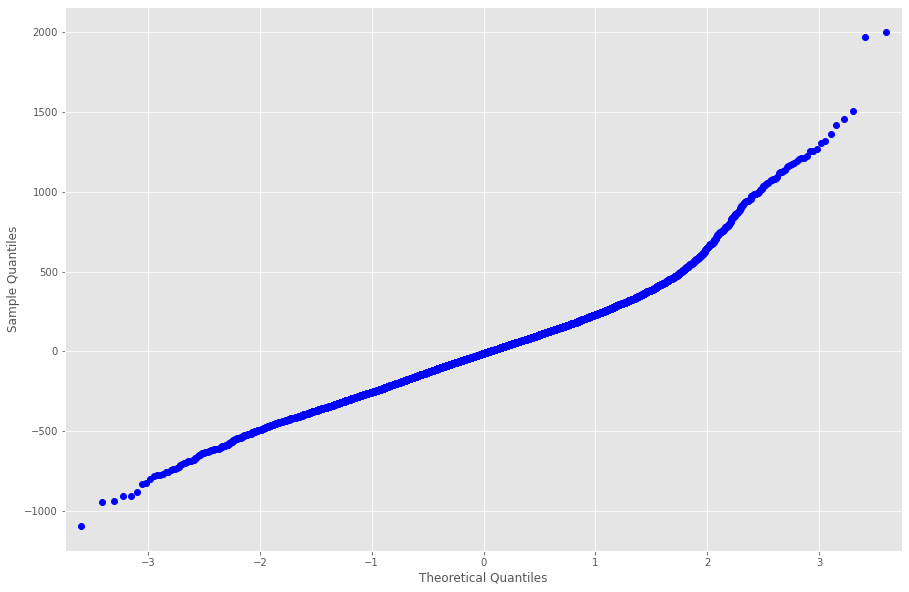

In [68]:
res = ml2.resid
sm.qqplot(res)
plt.show()

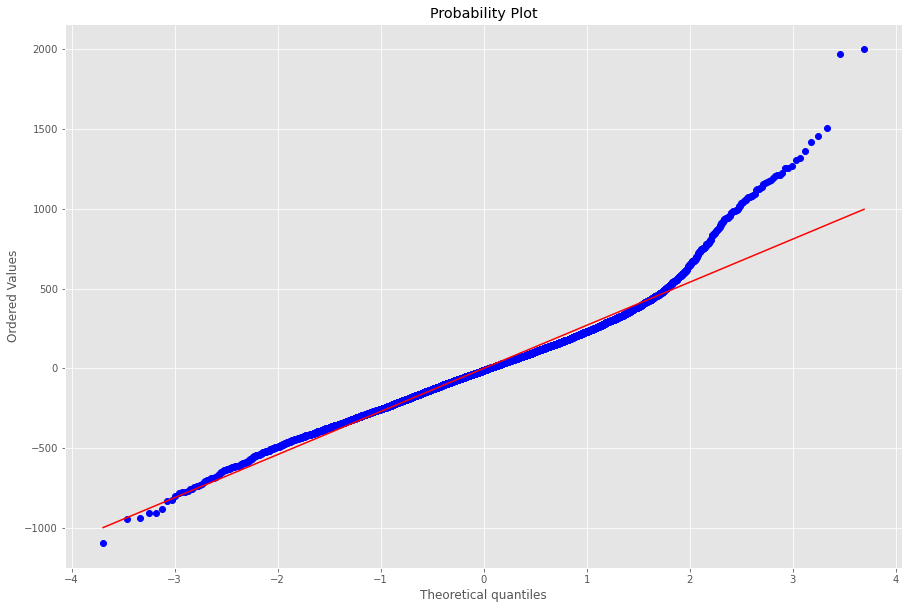

In [69]:
stats.probplot(res,dist='norm',plot=pylab)
plt.show()

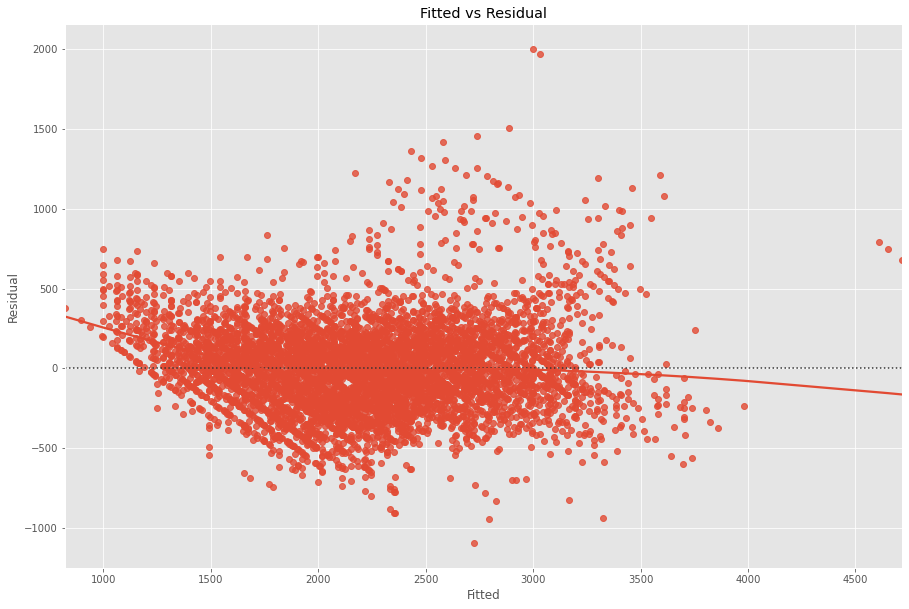

In [70]:
# Residuals vs Fitted plot
sns.residplot(x = pred, y = data1.price, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

Lets split our data into train and test

In [71]:
data1_train, data1_test = train_test_split(data1, test_size = 0.2)

In [72]:
model2_train = smf.ols('price ~ speed + hd + ram + screen + ads + trend + cd_yes + multi_yes + premium_yes',data = data1_train).fit()
model2_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     1959.
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:58:38   Log-Likelihood:                -35161.
No. Observations:                5007   AIC:                         7.034e+04
Df Residuals:                    4997   BIC:                         7.041e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2217.3846      3.839    577.589      0.000    2209.858    2224.911
speed         197.1837      4.344     45.392      0.000     188.667     205.700
hd            195.7236      7.972     24.552      0.000     180.095     211.352
ram           277.3009      6.661     41.629      0.000     264.242     290.360
screen        110.2033      4.011     27.474      0.000     102.340     118.067
ads            53.2302      4.222     12.609      0.000      44.954      61.506
trend        -401.9984      5.481    -73.350      0.000    -412.743    -391.254
cd_yes         30.8280      5.245      5.878      0.000      20.546      41.110
multi_yes      33.1085      4.348      7.615      0.000      24.585      41.632
premium_yes  -148.6283      4.029    -36.889      0.000    -156.527    -140.730
==============================================================================
Omnibus:                      752.327   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2216.342
Skew:                           0.791   Prob(JB):                         0.00
Kurtosis:                       5.850   Cond. No.                         4.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
test_pred2 = model2_train.predict(data1_test)

In [77]:
# test residual values 
test_resid1 = test_pred2 - data1_test.price

In [78]:
# RMSE value for test data 
test_rmse2 = np.sqrt(np.mean(test_resid1 * test_resid1))
test_rmse2

290.14096895348183

We build 2 models one with normal data not including any categorical variables, we got RMSE score of 314. We then transformed our data to be unit less barring `Price` column. We converted our variables to their respective z value. Post which we again created a model and the RMSE score improved from the first model. 2nd models RMSE score is 290